In [3]:
import os 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
os.getcwd()
os.chdir("..")
print(os.getcwd())

C:\Users\tom.pinckney\Documents\tidy-tuesday\meteorites


In [5]:
meteors = pd.read_csv("data/meteorites.csv")

print(meteors.shape)
meteors.head()

(45716, 10)


,name,id,name_type,class,mass,fall,year,lat,long,geolocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"


### Explore Categorical Features

In [9]:
# Not much of a distinction
meteors['class'].value_counts()

L6                  8339
H5                  7164
L5                  4817
H6                  4529
H4                  4222
LL5                 2766
LL6                 2045
L4                  1256
H4/5                 428
CM2                  416
H3                   387
L3                   365
CO3                  336
Ureilite             300
Iron, IIIAB          285
LL4                  268
CV3                  256
Diogenite            241
Howardite            240
LL                   225
Eucrite              221
Eucrite-pmict        207
E3                   206
H5/6                 193
Mesosiderite         137
CR2                  135
LL3                  128
EH3                  120
Iron, IIAB           118
Iron, ungrouped      113
                    ... 
EH3/4-an               1
L/LL3.10               1
Stone-ung              1
L3-melt breccia        1
LL3.9/4                1
R3-4                   1
L6-melt rock           1
H4-melt breccia        1
L5-7                   1


Lots of classes, many small classes could be grouped together


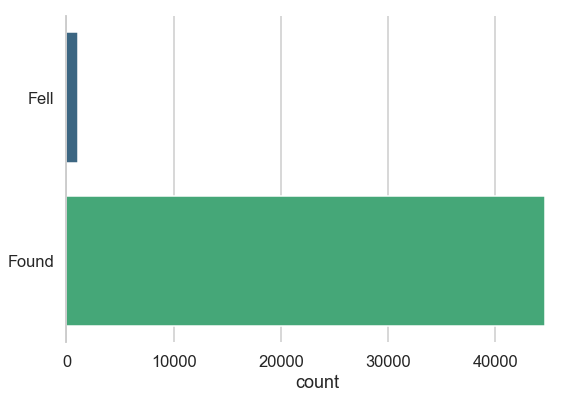

In [21]:
# Most were found
sns.set(context = 'talk',
        style = 'whitegrid')
f, ax = plt.subplots(figsize=(9, 6))
sns.countplot(y = 'fall',
              data = meteors,
             palette = ('viridis'))
ax.set(ylabel = '')
sns.despine(left = False,
           bottom = True)

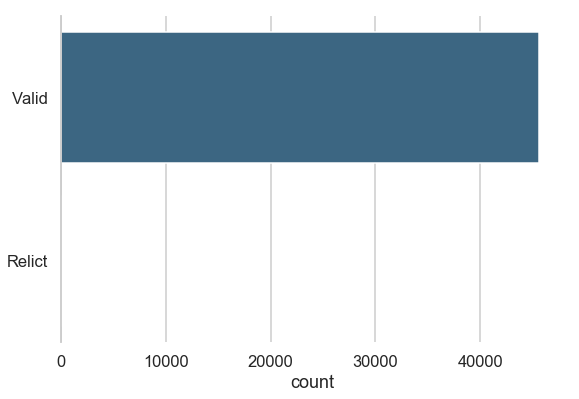

In [22]:
sns.set(context = 'talk',
        style = 'whitegrid')
f, ax = plt.subplots(figsize=(9, 6))
sns.countplot(y = 'name_type',
              data = meteors,
             palette = ('viridis'))
ax.set(ylabel = '')
sns.despine(left = False,
           bottom = True)

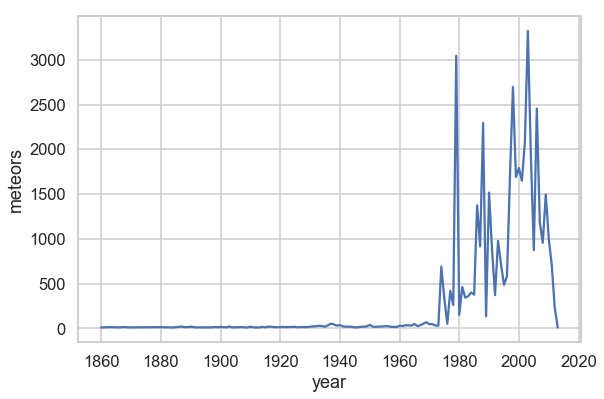

In [44]:
# Year of fall
yearly_falls = meteors.year.value_counts()[meteors.year.value_counts() > 10]

pd_yearly_falls = pd.DataFrame({'year' : yearly_falls.index,
                               'meteors' : yearly_falls.values})

f, ax = plt.subplots(figsize=(9, 6))
sns.lineplot(x = 'year',
             y = 'meteors',
             data = pd_yearly_falls,
             palette = ('viridis'))

Explore Numeric Features

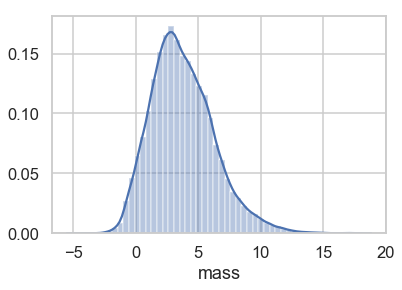

In [67]:
log_mass = np.log(meteors['mass'].dropna()[meteors['mass'].dropna() > 0])

sns.distplot(log_mass)

In [78]:
#Explore the Largest Meteors
large_meteors = meteors[meteors.mass > meteors.mass.quantile(.9)]

large_meteors.shape

(4559, 10)

[Text(0.5,1,'Where have recent large meteors landed?')]

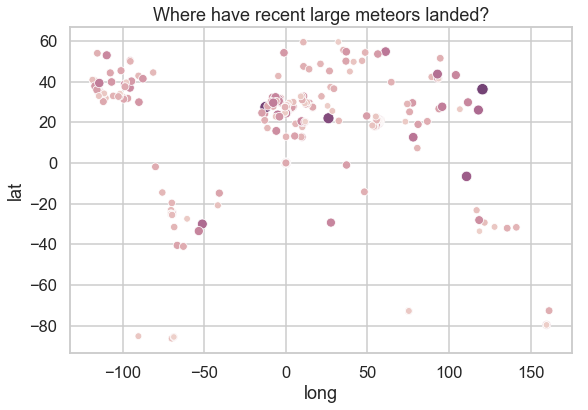

In [99]:
recent_large_meteors = large_meteors[large_meteors['year'] > 2000]
log_mass = np.log(large_meteors['mass'])

# Where do large meteors land
f, ax = plt.subplots(figsize=(9, 6))
sns.scatterplot(x = 'long',
                y = 'lat',
                size = log_mass,
                hue = log_mass,
                legend = False,
                data = recent_large_meteors)
ax.set(title = "Where have recent large meteors landed?")

In [100]:
# Try with map background
from mpl_toolkits.basemap import Basemap

ImportError: No module named basemap